In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (4032, 3024, 3)


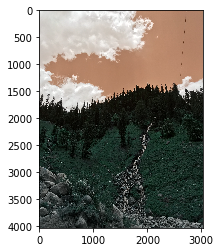

In [2]:
image = cv2.imread('Image.jpg') #to load an image from the specified file.
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

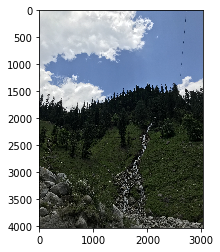

In [3]:
#OpenCV by default reads an image in color order BLUE GREEN RED i.e. in BGR. Thus we need to convert it into RED GREEN BLUE RGB. 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

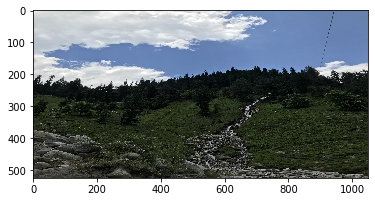

In [4]:
resized_image = cv2.resize(image, (1050, 525))
plt.imshow(resized_image)

In [5]:
#to format three numbers as 2 digit hexadecimal strings with leading 0s used if the number only consists of a single 
#digit in hex. This is used for producing RGB color values.
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
# to load the image, convert it into RGB and then returning that image.
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
#KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy.
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([196.29927956, 203.39183497, 211.38447305]),
 array([30.29088095, 36.83362037, 22.88415339]),
 array([225.3825189 , 228.31353135, 230.61338231]),
 array([110.53674388, 113.27695384, 110.33327779]),
 array([11.62694424, 16.7103374 , 12.83292654]),
 array([72.65577689, 75.03848606, 68.64549801]),
 array([108.1770226 , 135.73771522, 183.0639221 ]),
 array([45.67913304, 52.3284192 , 35.34848955])]

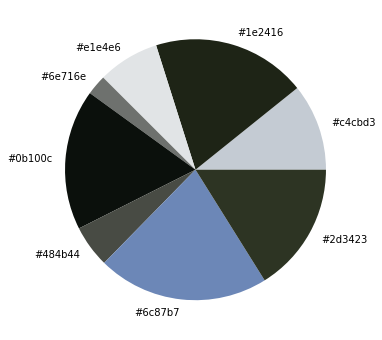

In [8]:
get_colors(get_image('Image.jpg'), 8, True)

In [9]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'WHITE' : [255,255,255],
    'PINK': [227,0,235],
    'RED': [255,0,0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

#to get the list of all files and directories in the specified directory.
for file in os.listdir(IMAGE_DIRECTORY):
    images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

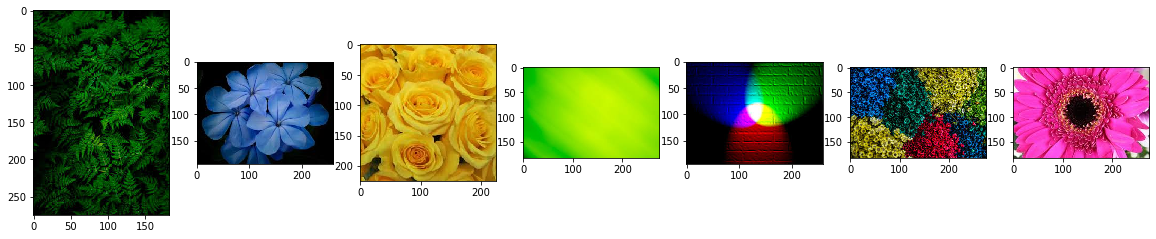

In [10]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [11]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]]))) #converts RGB to CIE 1976 L*a*b values. The CIELAB color space 
                                                              #(also known as CIE L*a*b*) is a color space defined by the  
                                                              #International Commission on Illumination (CIE) in 1976.

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color) #Euclidean distance between two points in Lab color space.
        if (diff < threshold):
            select_image = True
    
    return select_image

In [12]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

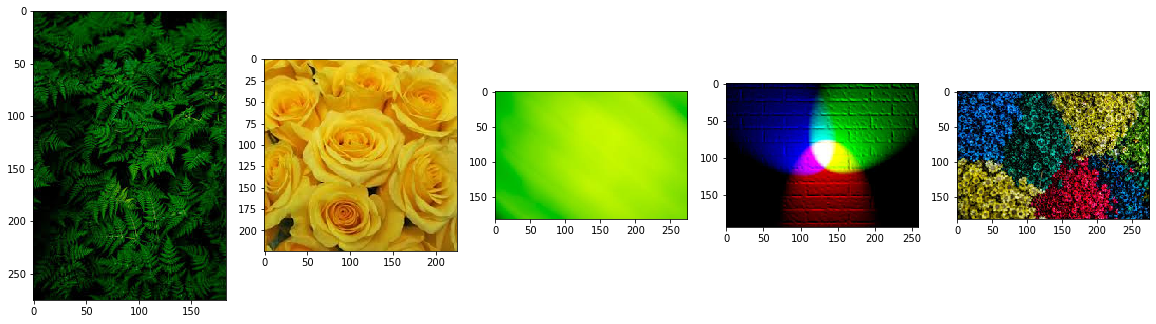

In [13]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

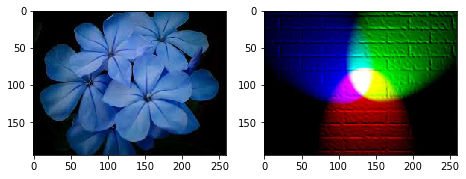

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

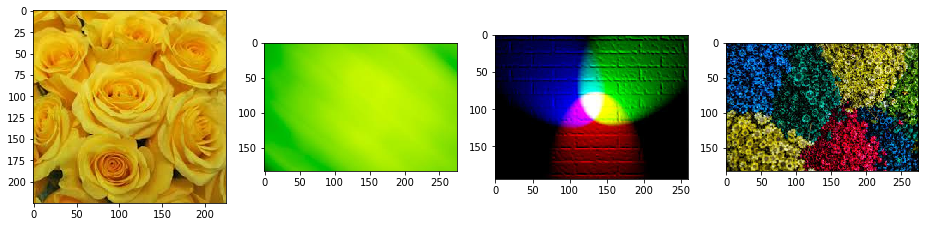

In [15]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

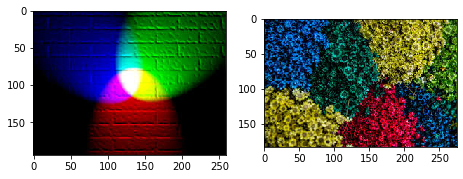

In [16]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

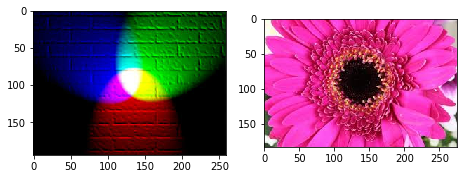

In [17]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['PINK'], 60, 5)

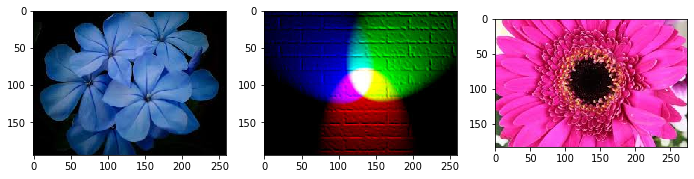

In [18]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['WHITE'], 60, 5)